In [4]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
from skimage import color, io, measure, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu

In [2]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    io.show()

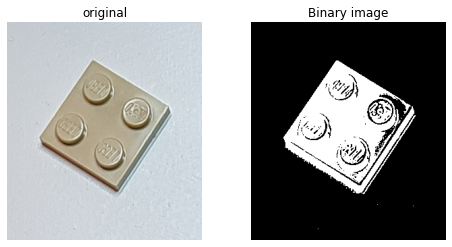

In [6]:
im_org = io.imread('data/lego_5.png')
gray = color.rgb2gray(im_org)
thres = threshold_otsu(gray)
bin_img = gray < thres
plot_comparison(im_org, bin_img, 'Binary image')

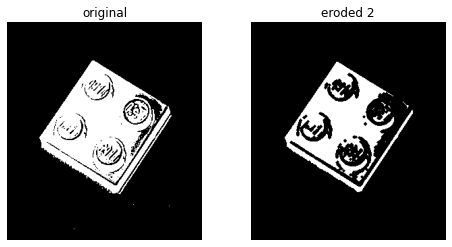

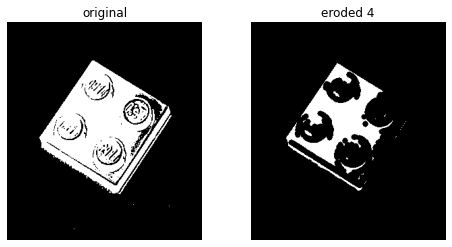

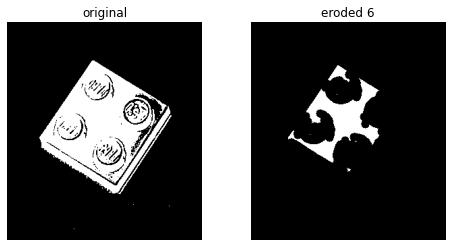

In [11]:
footprint = disk(2)
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img,eroded,'eroded 2')

footprint = disk(4)
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img,eroded,'eroded 4')

footprint = disk(6)
eroded = erosion(bin_img, footprint)
plot_comparison(bin_img,eroded,'eroded 6')

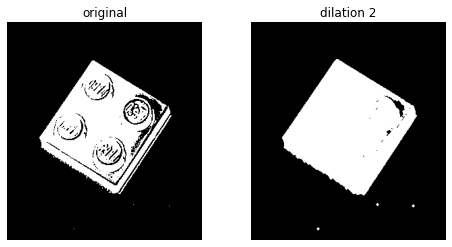

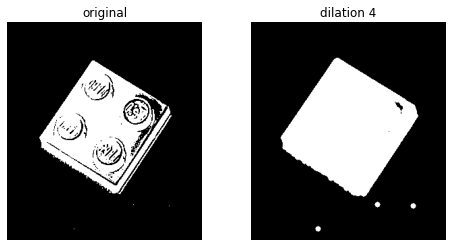

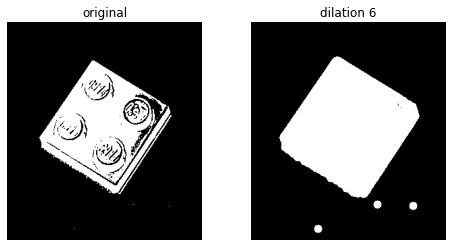

In [14]:
footprint = disk(2)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img,dilated,'dilation 2')

footprint = disk(4)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img,dilated,'dilation 4')

footprint = disk(6)
dilated = dilation(bin_img, footprint)
plot_comparison(bin_img,dilated,'dilation 6')

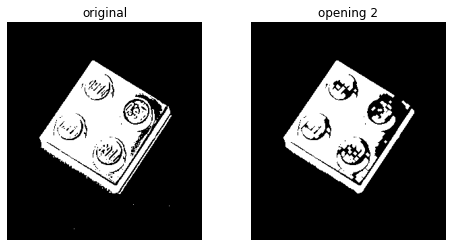

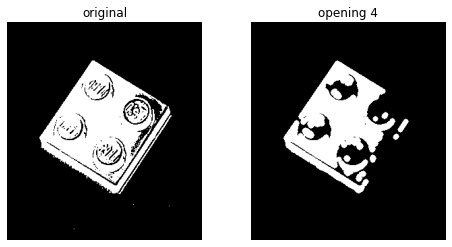

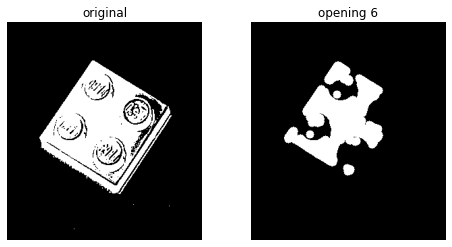

In [16]:
footprint = disk(2)
opened = opening(bin_img, footprint)
plot_comparison(bin_img,opened,'opening 2')

footprint = disk(4)
opened = opening(bin_img, footprint)
plot_comparison(bin_img,opened,'opening 4')

footprint = disk(6)
opened = opening(bin_img, footprint)
plot_comparison(bin_img,opened,'opening 6')

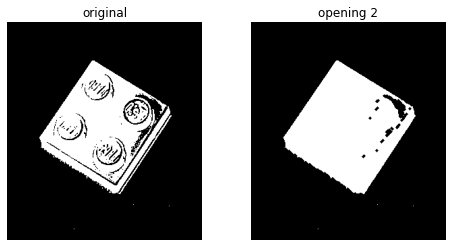

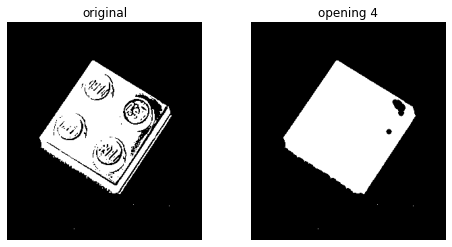

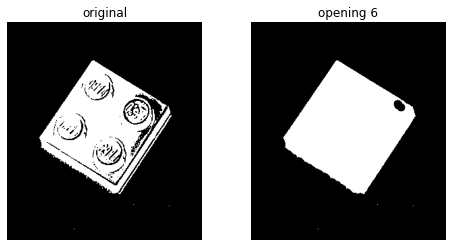

In [21]:
def apply_close(img, size):
    footprint = disk(size)
    closed = closing(img, footprint)
    return closed
for i in [2,4,6]:
    plot_comparison(bin_img,apply_close(bin_img,i),f'opening {i}')

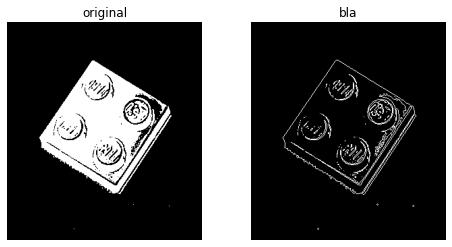

In [22]:
import numpy as np
def compute_outline(bin_img):
    """
    Computes the outline of a binary image
    """
    footprint = disk(1)
    dilated = dilation(bin_img, footprint)
    outline = np.logical_xor(dilated, bin_img)
    return outline
outlines = compute_outline(bin_img)
plot_comparison(bin_img,outlines,'bla')

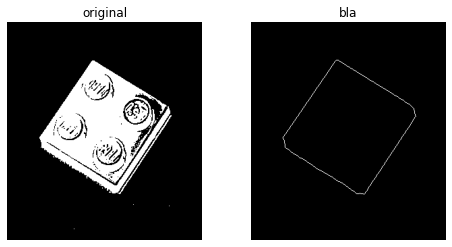

In [23]:
footprint = disk(1)
opened = opening(bin_img, footprint)
closed = apply_close(opened,15)
outlines = compute_outline(closed)
plot_comparison(bin_img,outlines,'bla')

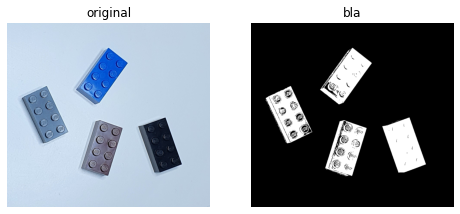

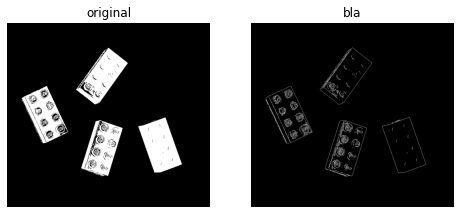

In [27]:
im_org = io.imread('data/lego_7.png')
gray = color.rgb2gray(im_org)
thres = threshold_otsu(gray)
newim = gray < thres
plot_comparison(im_org,newim,'bla')
outlines = compute_outline(newim)
plot_comparison(newim,outlines,'bla')

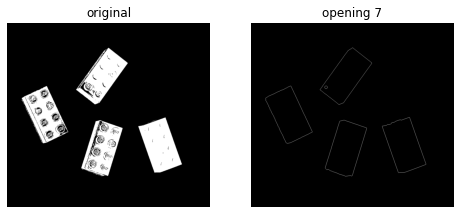

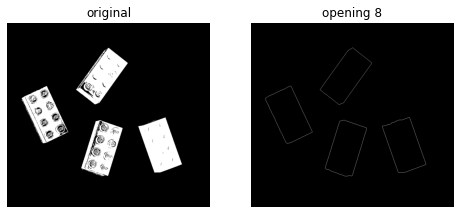

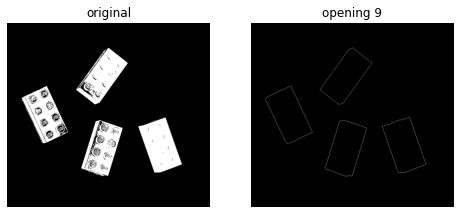

In [32]:
def apply_close_outline(img, size):
    footprint = disk(size)
    closed = closing(img, footprint)
    closed = compute_outline(closed)
    return closed
for i in [7,8,9]:
    plot_comparison(newim,apply_close_outline(newim,i),f'opening {i}')

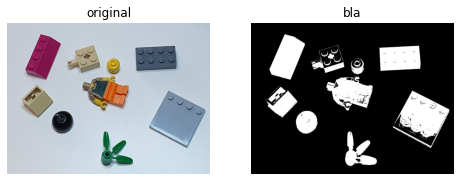

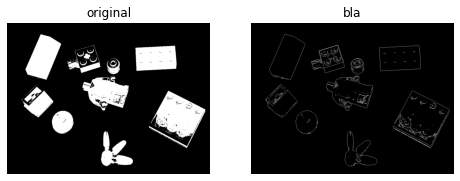

In [33]:
im_org = io.imread('data/lego_3.png')
gray = color.rgb2gray(im_org)
thres = threshold_otsu(gray)
newim3 = gray < thres
plot_comparison(im_org,newim3,'bla')
outlines = compute_outline(newim3)
plot_comparison(newim3,outlines,'bla')

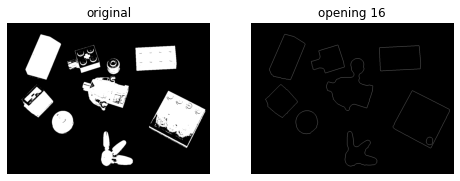

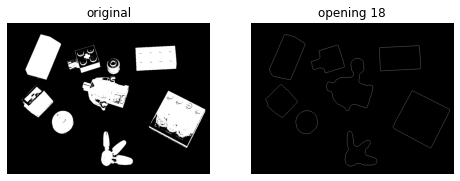

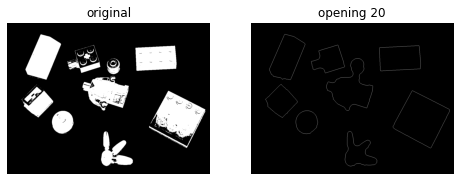

In [36]:
for i in [16,18,20]:
    plot_comparison(newim3,apply_close_outline(newim3,i),f'opening {i}')

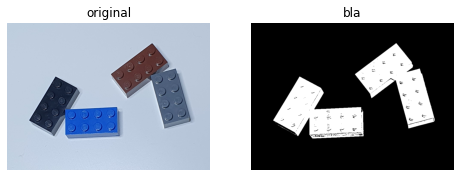

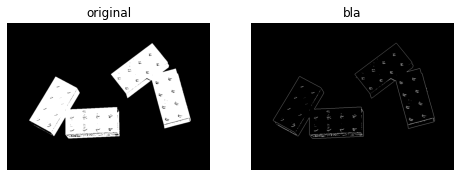

In [37]:
im_org = io.imread('data/lego_9.png')
gray = color.rgb2gray(im_org)
thres = threshold_otsu(gray)
newim3 = gray < thres
plot_comparison(im_org,newim3,'bla')
outlines = compute_outline(newim3)
plot_comparison(newim3,outlines,'bla')

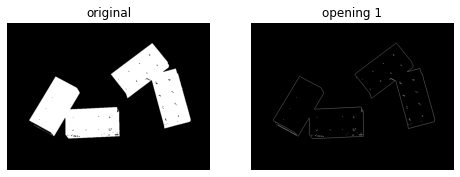

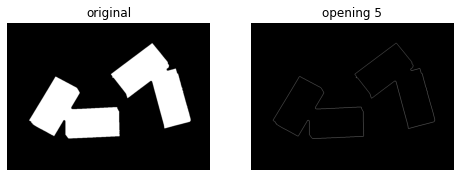

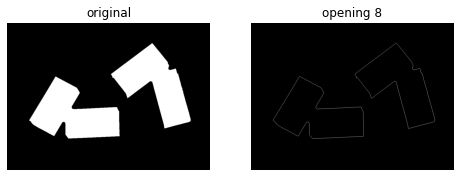

In [40]:
for i in [1,5,8]:
    plot_comparison(apply_close(newim3,i),apply_close_outline(newim3,i),f'opening {i}')

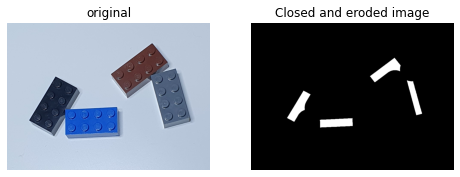

In [47]:
footprint = disk(50)
eroded = erosion(apply_close(newim3,5),footprint)
plot_comparison(im_org, eroded, 'Closed and eroded image')

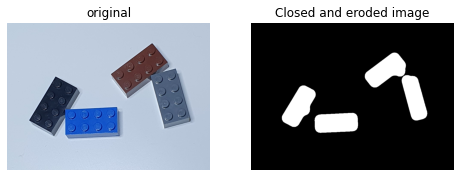

In [51]:
footprint = disk(25)
dilated = dilation(eroded,footprint)
plot_comparison(im_org, dilated, 'Closed and eroded image')

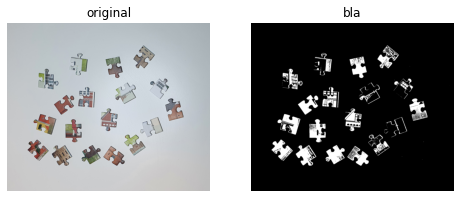

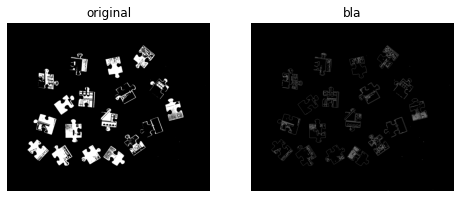

In [52]:
im_org = io.imread('data/puzzle_pieces.png')
gray = color.rgb2gray(im_org)
thres = threshold_otsu(gray)
newim = gray < thres
plot_comparison(im_org,newim,'bla')
outlines = compute_outline(newim)
plot_comparison(newim,outlines,'bla')

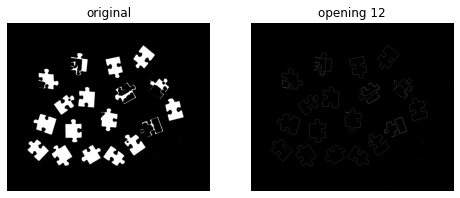

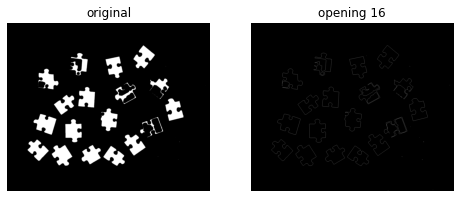

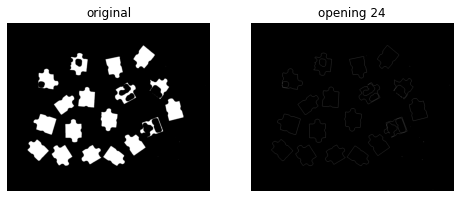

In [54]:
for i in [12,16,24]:
    plot_comparison(apply_close(newim,i),apply_close_outline(newim,i),f'opening {i}')